# ANALYSIS OF POPULARITY OF TRACKS IN SPOTIFY

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Required Dataset

In [28]:
df = pd.read_csv('spotify_tracks_popularity.csv')
df.head()

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Clean and Prepare Data

In [27]:
#Dataset Overview
print(f"Shape of the dataset: {df.shape}")
print("\nData Types:")
print(df.dtypes)

Shape of the dataset: (114000, 21)

Data Types:
index                 int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [28]:
#Checks for Missing Values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values:
artists       1
album_name    1
track_name    1
dtype: int64


In [29]:
#check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates(keep='first')
    print(f"Shape after removing duplicates: {df.shape}")



Number of duplicate rows: 0


In [30]:
#Handle Missing Values
if df.isnull().sum().sum() > 0:
    for col in df.select_dtypes(include=[np.number]).columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())

    for col in df.select_dtypes(exclude=[np.number]).columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])
            
    print("\nMissing values after handling:")
    print(df.isnull().sum().sum())



Missing values after handling:
0


In [32]:
#Summary Statistics

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nSummary statistics for numerical columns:")
df[numeric_cols].describe()



Summary statistics for numerical columns:


,index,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [38]:
#Clean popularity Column
if 'popularity' in df.columns:
    print(f"\nPopularity range before cleaning: "
          f"{df['popularity'].min()} - {df['popularity'].max()}")
    if df['popularity'].max() > 100 or df['popularity'].min() < 0:
        df['popularity'] = df['popularity'].clip(0, 100)
        print(f"Popularity range after cleaning: "
              f"{df['popularity'].min()} - {df['popularity'].max()}")


Popularity range before cleaning: 0 - 100


In [49]:
#Convert duration_ms to seconds

if 'duration_ms' in df.columns:
    df['duration_ms'] = df['duration_ms'] / 1000
    df = df.rename(columns={'duration_ms': 'duration_sec'})
    print("\nConverted duration_ms to duration_sec (in seconds)")

In [50]:
#Final Checks

print("\nFinal dataset shape:", df.shape)
print("Final check for missing values:", df.isnull().sum().sum())

df.head()



Final dataset shape: (114000, 21)
Final check for missing values: 0


,index,track_id,artists,album_name,track_name,popularity,duration_sec,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230.666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149.610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210.826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201.933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198.853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Analyze Data

### Top 10 Most Popular Songs

In [39]:
top_10_songs = df[['track_name', 'artists', 'popularity']] \
                .sort_values(by='popularity', ascending=False) \
                .drop_duplicates(subset='track_name') \
                .head(10)

top_10_songs

,track_name,artists,popularity
81051,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
89411,La Bachata,Manuel Turizo,98
81210,I'm Good (Blue),David Guetta;Bebe Rexha,98
88407,Tití Me Preguntó,Bad Bunny,97
68305,Me Porto Bonito,Bad Bunny;Chencho Corleone,97
81003,Under The Influence,Chris Brown,96
67559,Efecto,Bad Bunny,96
81174,I Ain't Worried,OneRepublic,96
68353,Ojitos Lindos,Bad Bunny;Bomba Estéreo,95


### Most Popular Artists by Average Popularity

In [ ]:
top_artists = df.groupby('artists')['popularity'] \
                .mean() \
                .sort_values(ascending=False) \
                .head(10)

top_artists

artists
Sam Smith;Kim Petras           100.0
Bizarrap;Quevedo                99.0
Manuel Turizo                   98.0
Bad Bunny;Chencho Corleone      97.0
Bad Bunny;Bomba Estéreo         94.5
Joji                            94.0
Beyoncé                         93.0
Harry Styles                    92.0
Rema;Selena Gomez               92.0
Rauw Alejandro;Lyanno;Brray     91.0
Name: popularity, dtype: float64

### Distribution of Track Popularity

In [42]:
popularity_dist = df['popularity'].value_counts().sort_index()
popularity_dist


popularity
0      16020
1       2140
2       1036
3        585
4        389
       ...  
96         7
97         8
98         7
99         1
100        2
Name: count, Length: 101, dtype: int64

### Scatter Data: Energy vs Popularity

In [46]:
scatter_energy_popularity = df[['energy', 'popularity']].dropna()
scatter_energy_popularity.head()

,energy,popularity
0,0.4610,73
1,0.1660,55
2,0.3590,57
3,0.0596,71
4,0.4430,82


### Relationship Between Danceability and Popularity

In [45]:
scatter_dance_popularity = df[['danceability', 'popularity']].dropna()
scatter_dance_popularity.head()

,danceability,popularity
0,0.676,73
1,0.420,55
2,0.438,57
3,0.266,71
4,0.618,82


## Visualize Analyzed Data

### Top 10 Most Popular Songs


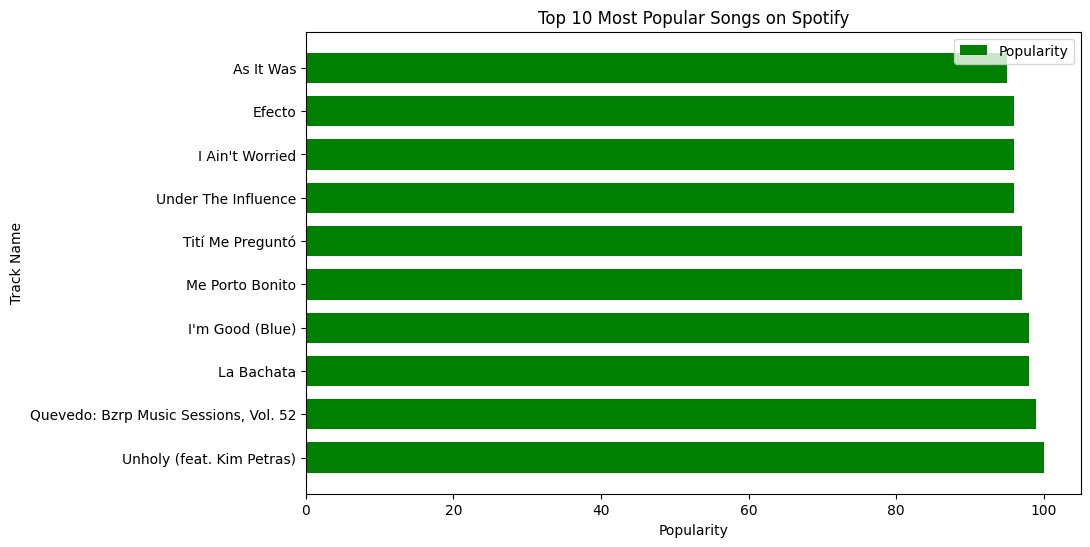

In [24]:
plt.figure(figsize=(10,6))
plt.barh(top_10_songs['track_name'], top_10_songs['popularity'], color='green', height=0.7, label='Popularity')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.title('Top 10 Most Popular Songs on Spotify')
plt.legend()
plt.show()


### Top 10 Most Popular Artists

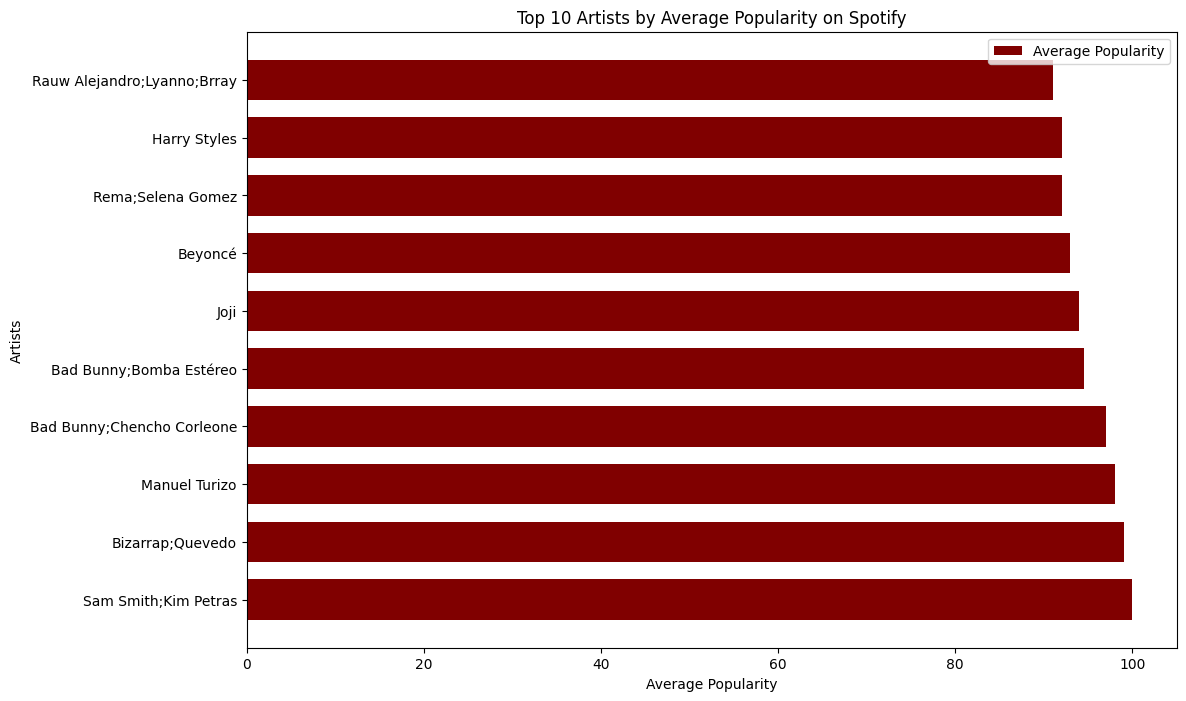

In [25]:
plt.figure(figsize=(12, 8))
plt.barh(top_artists.index, top_artists.values, color='maroon', height=0.7, label='Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artists')
plt.title('Top 10 Artists by Average Popularity on Spotify')
plt.legend()
plt.show()

### Distribution of Track Popularity

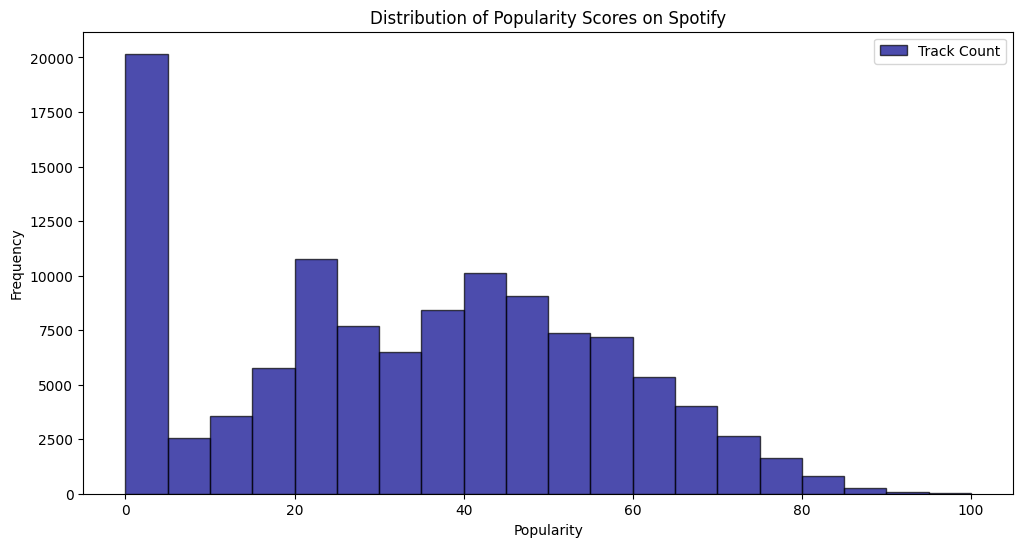

In [26]:
plt.figure(figsize=(12, 6))
hist = plt.hist(df['popularity'], bins=20, color='darkblue', edgecolor='black', alpha=0.7, label='Track Count')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Scores on Spotify')
plt.legend()
plt.show()

### Energy vs Popularity Scatter Plot

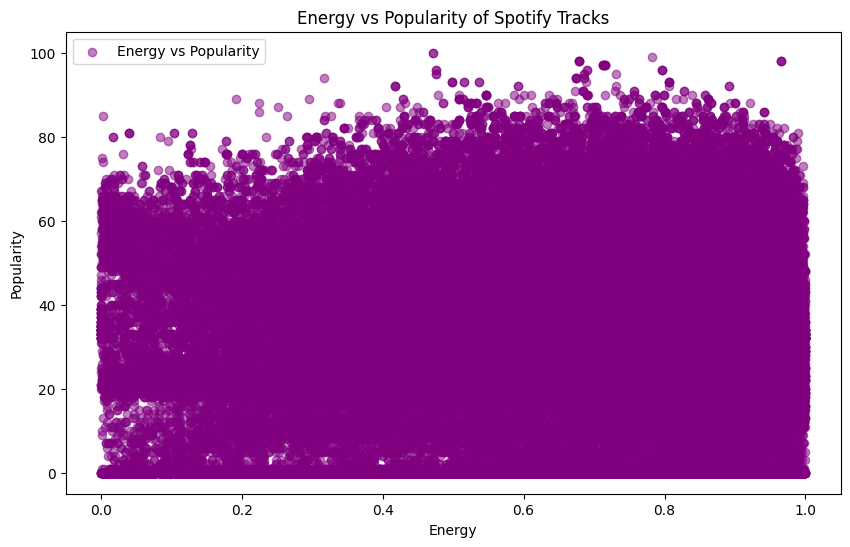

In [30]:
scatter_energy_popularity = df[['energy', 'popularity']].dropna()
plt.figure(figsize=(10, 6))
plt.scatter(scatter_energy_popularity['energy'], scatter_energy_popularity['popularity'],
            alpha=0.5, color='purple', label='Energy vs Popularity')
plt.title('Energy vs Popularity of Spotify Tracks')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.legend()
plt.show()

### Danceability vs Popularity Scatter Plot

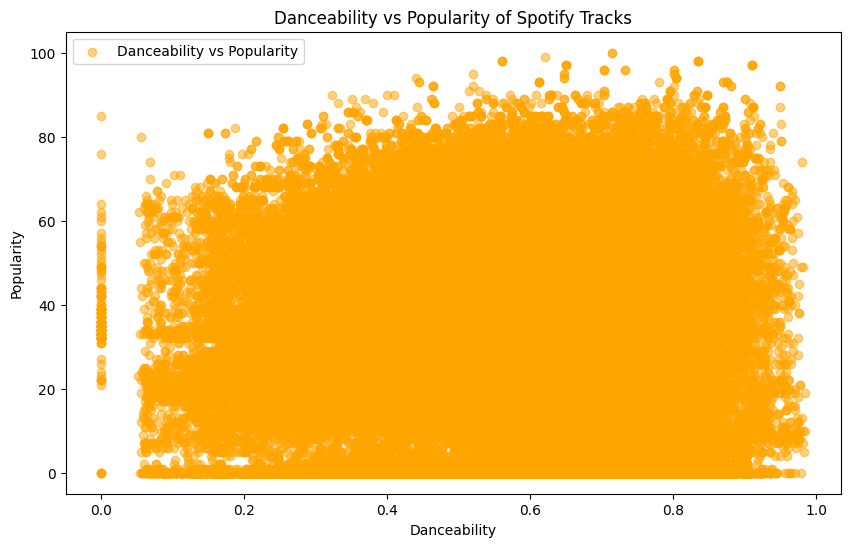

In [31]:
scatter_dance_popularity = df[['danceability', 'popularity']].dropna()
plt.figure(figsize=(10, 6))
plt.scatter(scatter_dance_popularity['danceability'], scatter_dance_popularity['popularity'],
            alpha=0.5, color='orange', label='Danceability vs Popularity')
plt.title('Danceability vs Popularity of Spotify Tracks')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend()
plt.show()

## Report Findings

### Top 10 Most Popular Songs on Spotify
    Based on the analysis, the top 10 most popular songs on Spotify are:
    1. Unholy (feat. Kim Petras) by Sam Smith;Kim Petras, Score: 100
    2.Quevedo: Bzrp Music Sessions, Vol. 52 by Bizarrap;Quevedo, Score: 99
    3. La Bachata by Manuel Turizo, Score: 98
    4. I'm Good (Blue) by David Guetta;Bebe Rexha, Score: 98
    5. Tití Me Preguntó by Bad Bunny, Score: 97
    6. Me Porto Bonito by Bad Bunny;Chencho Corleone, Score: 97
    7. Under The Influence by Chris Brown, Score: 96
    8. Efecto by Bad Bunny, Score: 96
    9. I Ain't Worried by OneRepublic, Score: 96
    10 Ojitos Lindos by Bad Bunny;Bomba Estéreo Score: 95
    
### Top 10 Most Popular Artists on Spotify
    Based on the analysis, the top 10 most popular artists on Spotify are:
    1. Sam Smith;Kim Petras             100.0
    2. Bizarrap;Quevedo                 99.0
    3. Manuel Turizo                    98.0
    4. Bad Bunny;Chencho Corleone       97.0
    5. Bad Bunny;Bomba Estéreo          94.5
    6. Joji                             94.0
    7. Beyoncé                          93.0
    8. Harry Styles                     92.0
    9. Rema;Selena Gomez                92.0
    10. Rauw Alejandro;Lyanno;Brray     91.0

### Distribution of Track Popularity
    The distribution of track popularity shows that most tracks have a popularity score between 20 and 60, with a peak around the 0-5 range. This indicates that many tracks are not that popular, with fewer tracks having high popularity scores.

### Energy vs Popularity

    The scatter plot of energy vs popularity shows a positive correlation between the two variables. Tracks with higher energy tend to have higher popularity scores, indicating that energetic tracks are more likely to be popular on Spotify.

### Danceability vs Popularity
    The scatter plot of danceability vs popularity shows a positive correlation between the two variables. While tracks with higher danceability scores tend to have slightly higher popularity scores, the relationship indicates that songs with high danceability are likely to be more popular.